In [64]:
!pip install numpy matplotlib

!pip install ipython


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# Amplitude Damping Channel (Simulation)

Amplitude damping models **energy loss** (e.g. spontaneous emission):

\[
|1\rangle \rightarrow |0\rangle
\]

It is described by Kraus operators:

\[
E_0 =
\begin{pmatrix}
1 & 0\\
0 & \sqrt{1-\gamma}
\end{pmatrix},
\qquad
E_1 =
\begin{pmatrix}
0 & \sqrt{\gamma}\\
0 & 0
\end{pmatrix}
\]

The channel is:

\[
\mathcal{E}(\rho)=E_0\rho E_0^\dagger + E_1\rho E_1^\dagger.
\]

We simulate the output state and plot fidelity vs damping parameter \(\gamma\).


Example gamma = 0.3
Output density matrix rho_out =
 [[0.552     +0.j 0.40159681+0.j]
 [0.40159681+0.j 0.448     +0.j]]


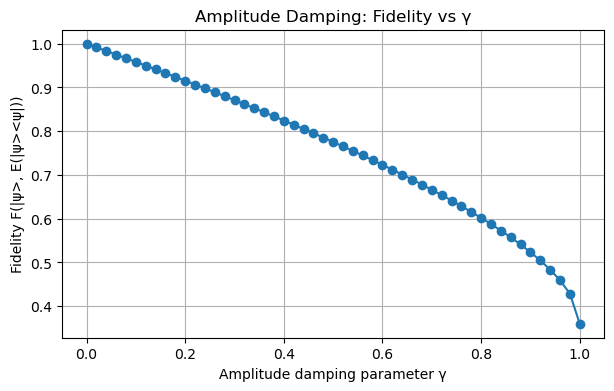

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# --- Basic helpers
def normalize(v):
    return v / np.linalg.norm(v)

def rho_from_state(psi):
    return np.outer(psi, np.conjugate(psi))

def fidelity_pure_vs_rho(psi, rho):
    return float(np.real(np.vdot(psi, rho @ psi)))

# --- Amplitude damping Kraus operators
def amplitude_damping_kraus(gamma):
    E0 = np.array([[1, 0],
                   [0, np.sqrt(1-gamma)]], dtype=complex)
    E1 = np.array([[0, np.sqrt(gamma)],
                   [0, 0]], dtype=complex)
    return [E0, E1]

def apply_kraus(rho, kraus_ops):
    out = np.zeros_like(rho, dtype=complex)
    for E in kraus_ops:
        out += E @ rho @ E.conj().T
    return out

# --- Example initial state |psi> = alpha|0> + beta|1>
alpha = 0.6
beta = np.sqrt(1 - alpha**2)
psi = np.array([alpha, beta], dtype=complex)
psi = normalize(psi)
rho = rho_from_state(psi)

gammas = np.linspace(0, 1, 51)
F = []

for g in gammas:
    kraus_ops = amplitude_damping_kraus(g)
    rho_out = apply_kraus(rho, kraus_ops)
    F.append(fidelity_pure_vs_rho(psi, rho_out))

# Print example
g_test = 0.3
rho_test = apply_kraus(rho, amplitude_damping_kraus(g_test))
print("Example gamma =", g_test)
print("Output density matrix rho_out =\n", rho_test)

# Plot fidelity
plt.figure(figsize=(7,4))
plt.plot(gammas, F, marker="o")
plt.xlabel("Amplitude damping parameter γ")
plt.ylabel("Fidelity F(|ψ>, E(|ψ><ψ|))")
plt.title("Amplitude Damping: Fidelity vs γ")
plt.grid(True)
plt.show()
